Project :- TITANIC SURVIVAL PREDICTION

Instructions:-

1)Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

2)The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

#Importing important Libraries, Read dataset and Analyzing

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Titanic-Dataset.csv', encoding='latin-1')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
#Getting the Shape
print('Dataset Shape:', df.shape)

Dataset Shape: (891, 12)


In [68]:
#Getting the Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
#Getting the Null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [70]:
#Getting Duplicate values
df.duplicated().sum()

0

In [71]:
#Getting the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Making a copy of the original data to prevent any inconvenience

In [72]:
df1 = df.copy()

#Initiate Data Cleaning process....

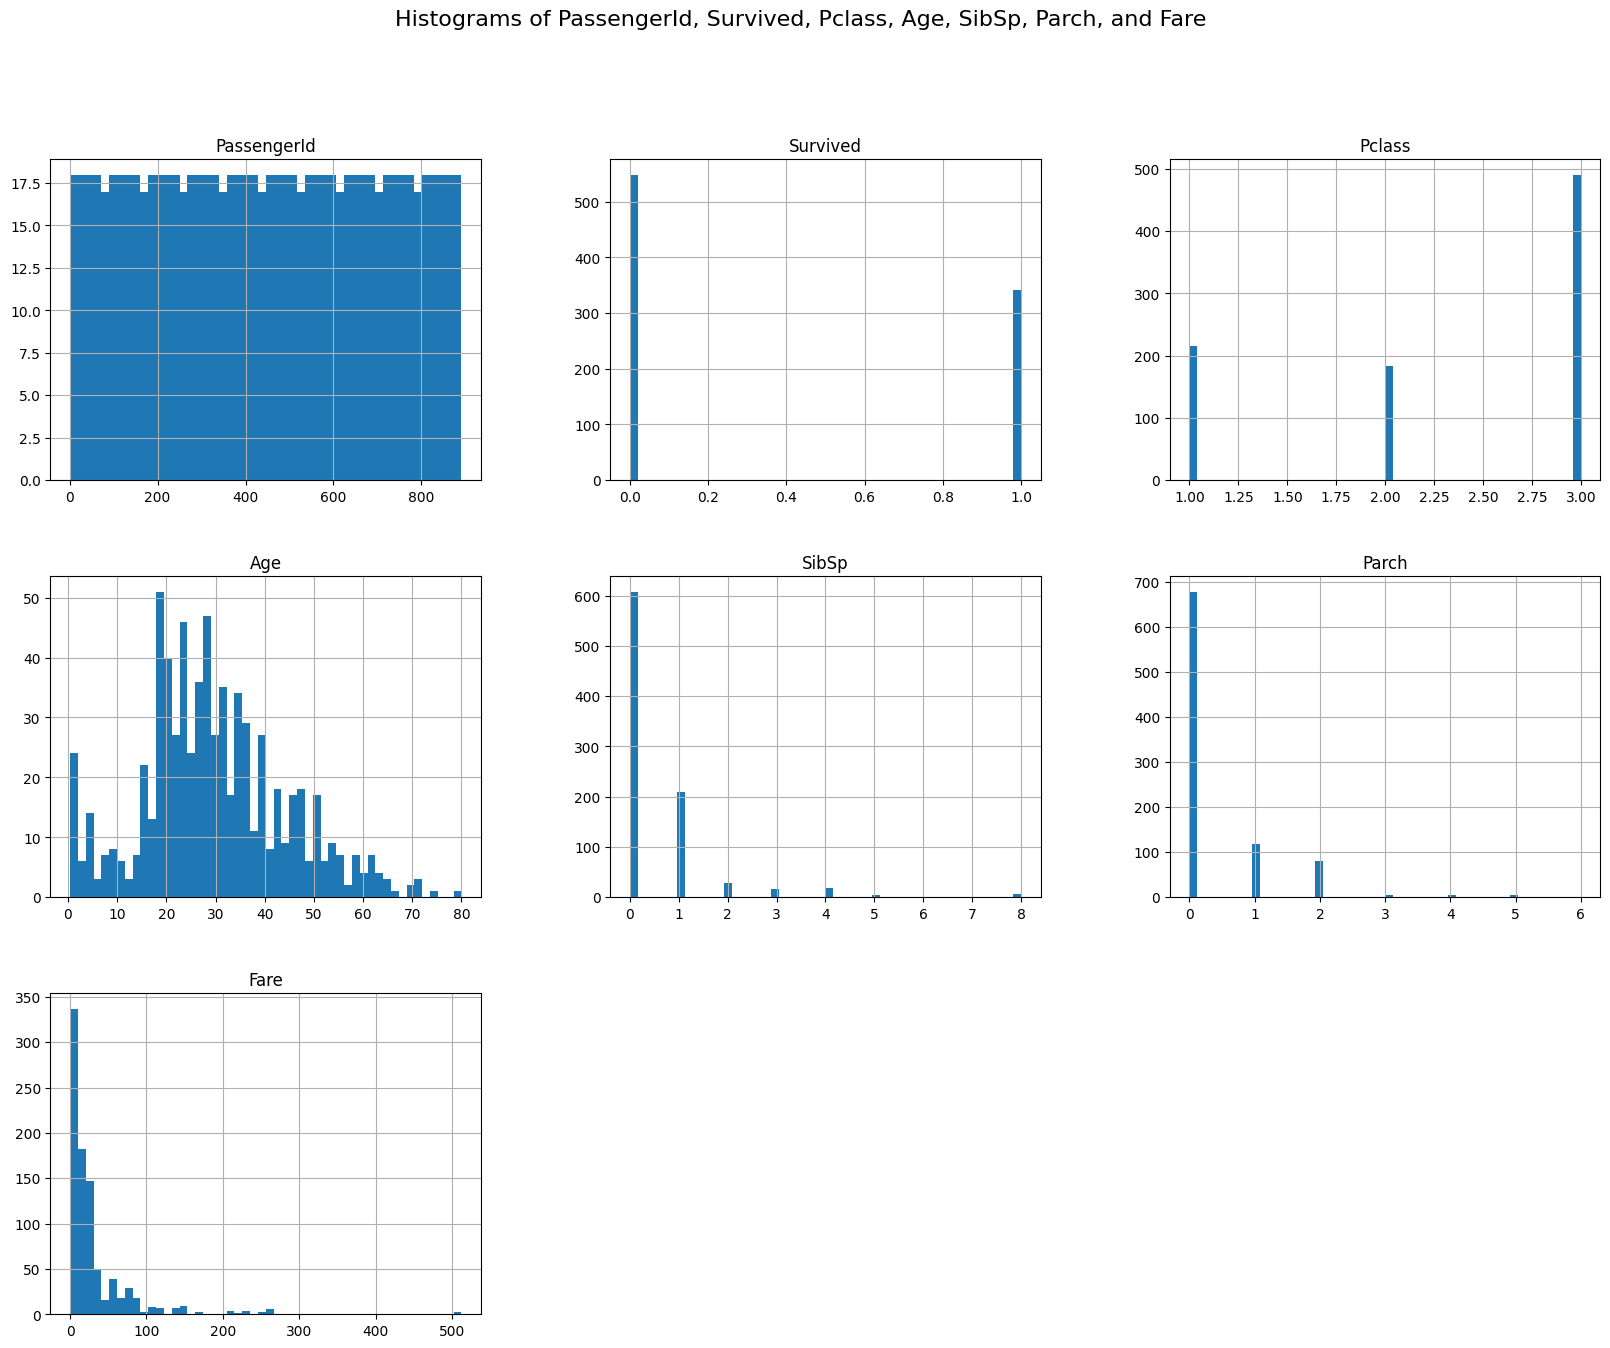

In [73]:
#checking the distribution using Histogram
df1.hist(bins=50, figsize=(20,15))
plt.suptitle('Histograms of PassengerId, Survived, Pclass, Age, SibSp, Parch, and Fare', fontsize=16)
plt.show()

###### By the observation be observed the Age column is right skewed. so we handled the missing value of age column with mean values

In [74]:
# Fill missing 'Age' values with median and 'Embarked' with the mode
df1['Age'].fillna(df1['Age'].median(), inplace=True)
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)

In [75]:
# Drop 'Cabin' column and 'Name' (as it's not useful for modeling)
df1.drop(columns=['Cabin', 'Name','PassengerId','Ticket'], inplace=True)



In [76]:
df1.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
#Done some univariate analysis for more data visibility

In [77]:
#checking the distribution after handling the null values
import plotly.express as px
fig = px.histogram(df1, x="Age", nbins=50)
fig.show()

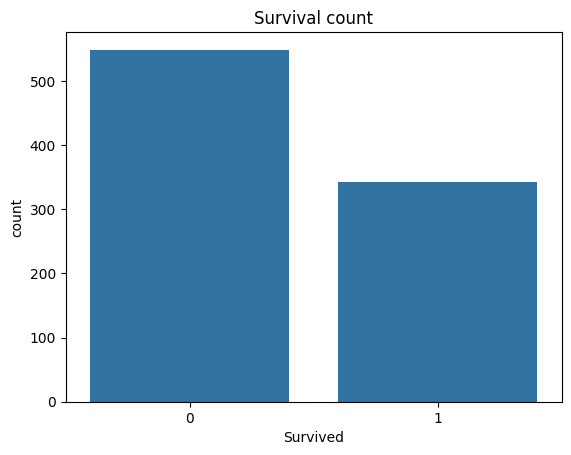

In [78]:
sns.countplot(x='Survived', data=df1)
plt.title('Survival count')
plt.show()

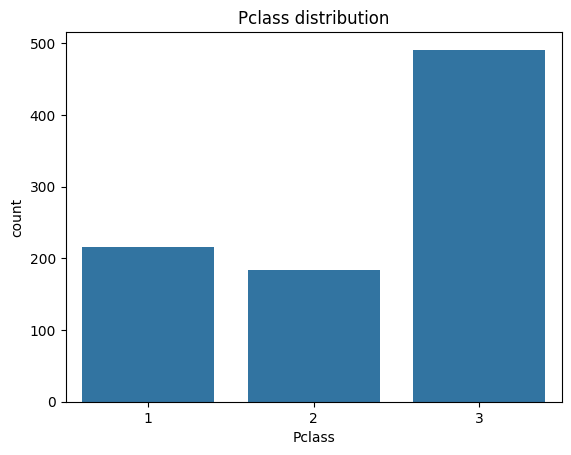

In [79]:
sns.countplot(x='Pclass', data=df1)
plt.title('Pclass distribution')
plt.show()

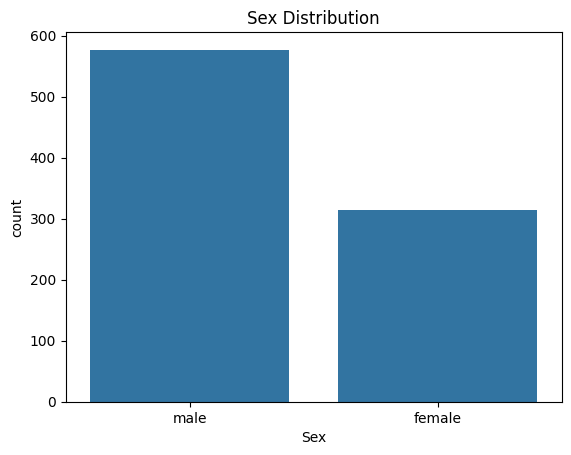

In [80]:
sns.countplot(x='Sex', data=df1)
plt.title('Sex Distribution')
plt.show()

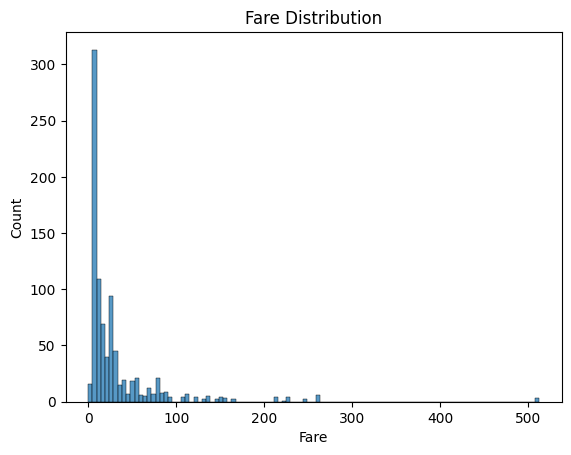

In [81]:
sns.histplot(x='Fare', data=df1)
plt.title('Fare Distribution')
plt.show()

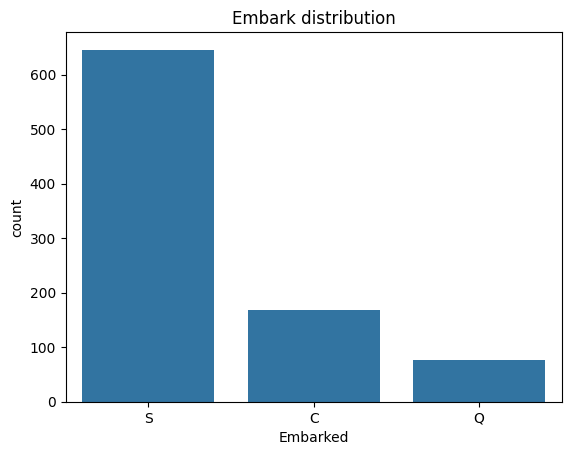

In [82]:
sns.countplot(x='Embarked', data=df1)
plt.title('Embark distribution')
plt.show()

###Information from analysis
#####"Gender" :- Number of male is more than female
#####"Age" :- It is right skewed.The distribution of passanger is more between the range(20, 40)

##Encoding the categorical column into numerical column

In [83]:
df1['Sex'] = df1['Sex'].map({'male': 0, 'female': 1})
df1 = pd.get_dummies(df1, columns=['Embarked'], drop_first=True)

In [85]:
#Standardize 'Age' and 'Fare' columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[['Age', 'Fare']] = scaler.fit_transform(df1[['Age', 'Fare']])

#Checking multivariate

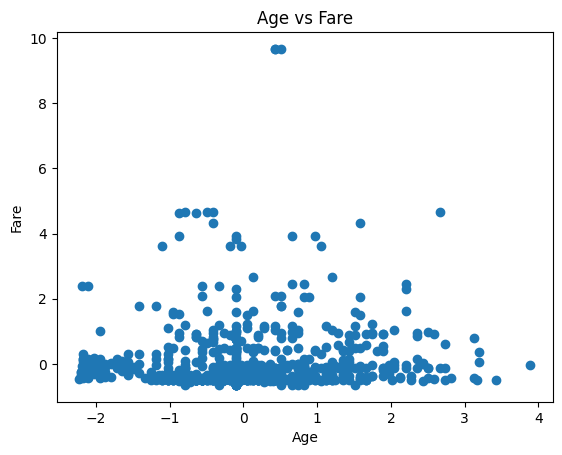

In [86]:
plt.scatter(df1['Age'], df1['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare')
plt.show()

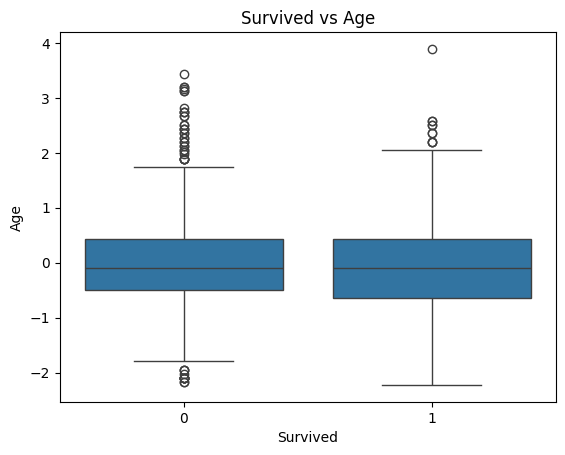

In [87]:
sns.boxplot(x='Survived', y='Age', data=df1)
plt.title('Survived vs Age')
plt.show()

#Finding Correlation

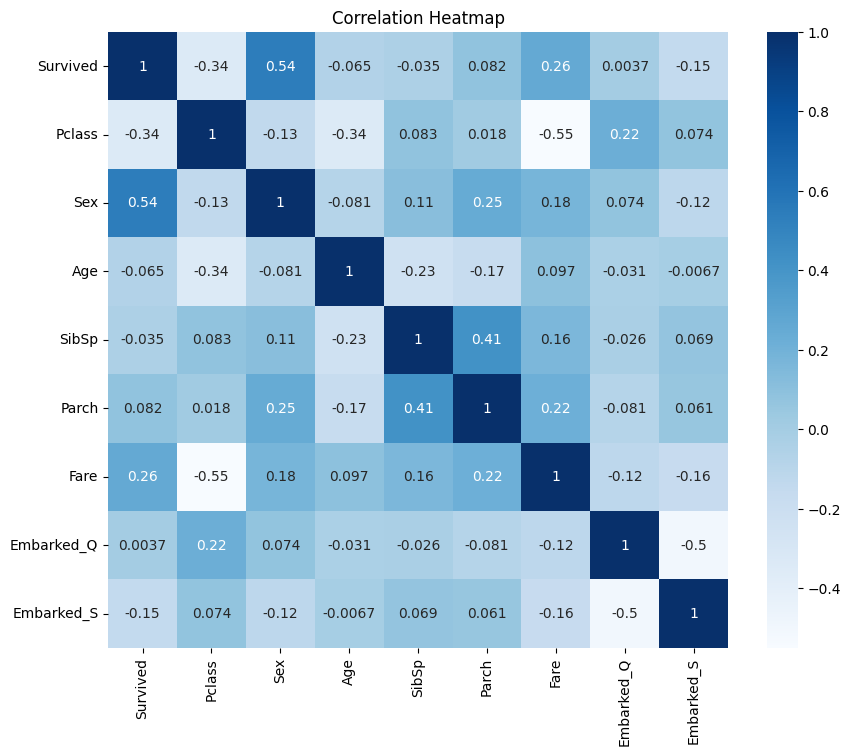

In [88]:
corr = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

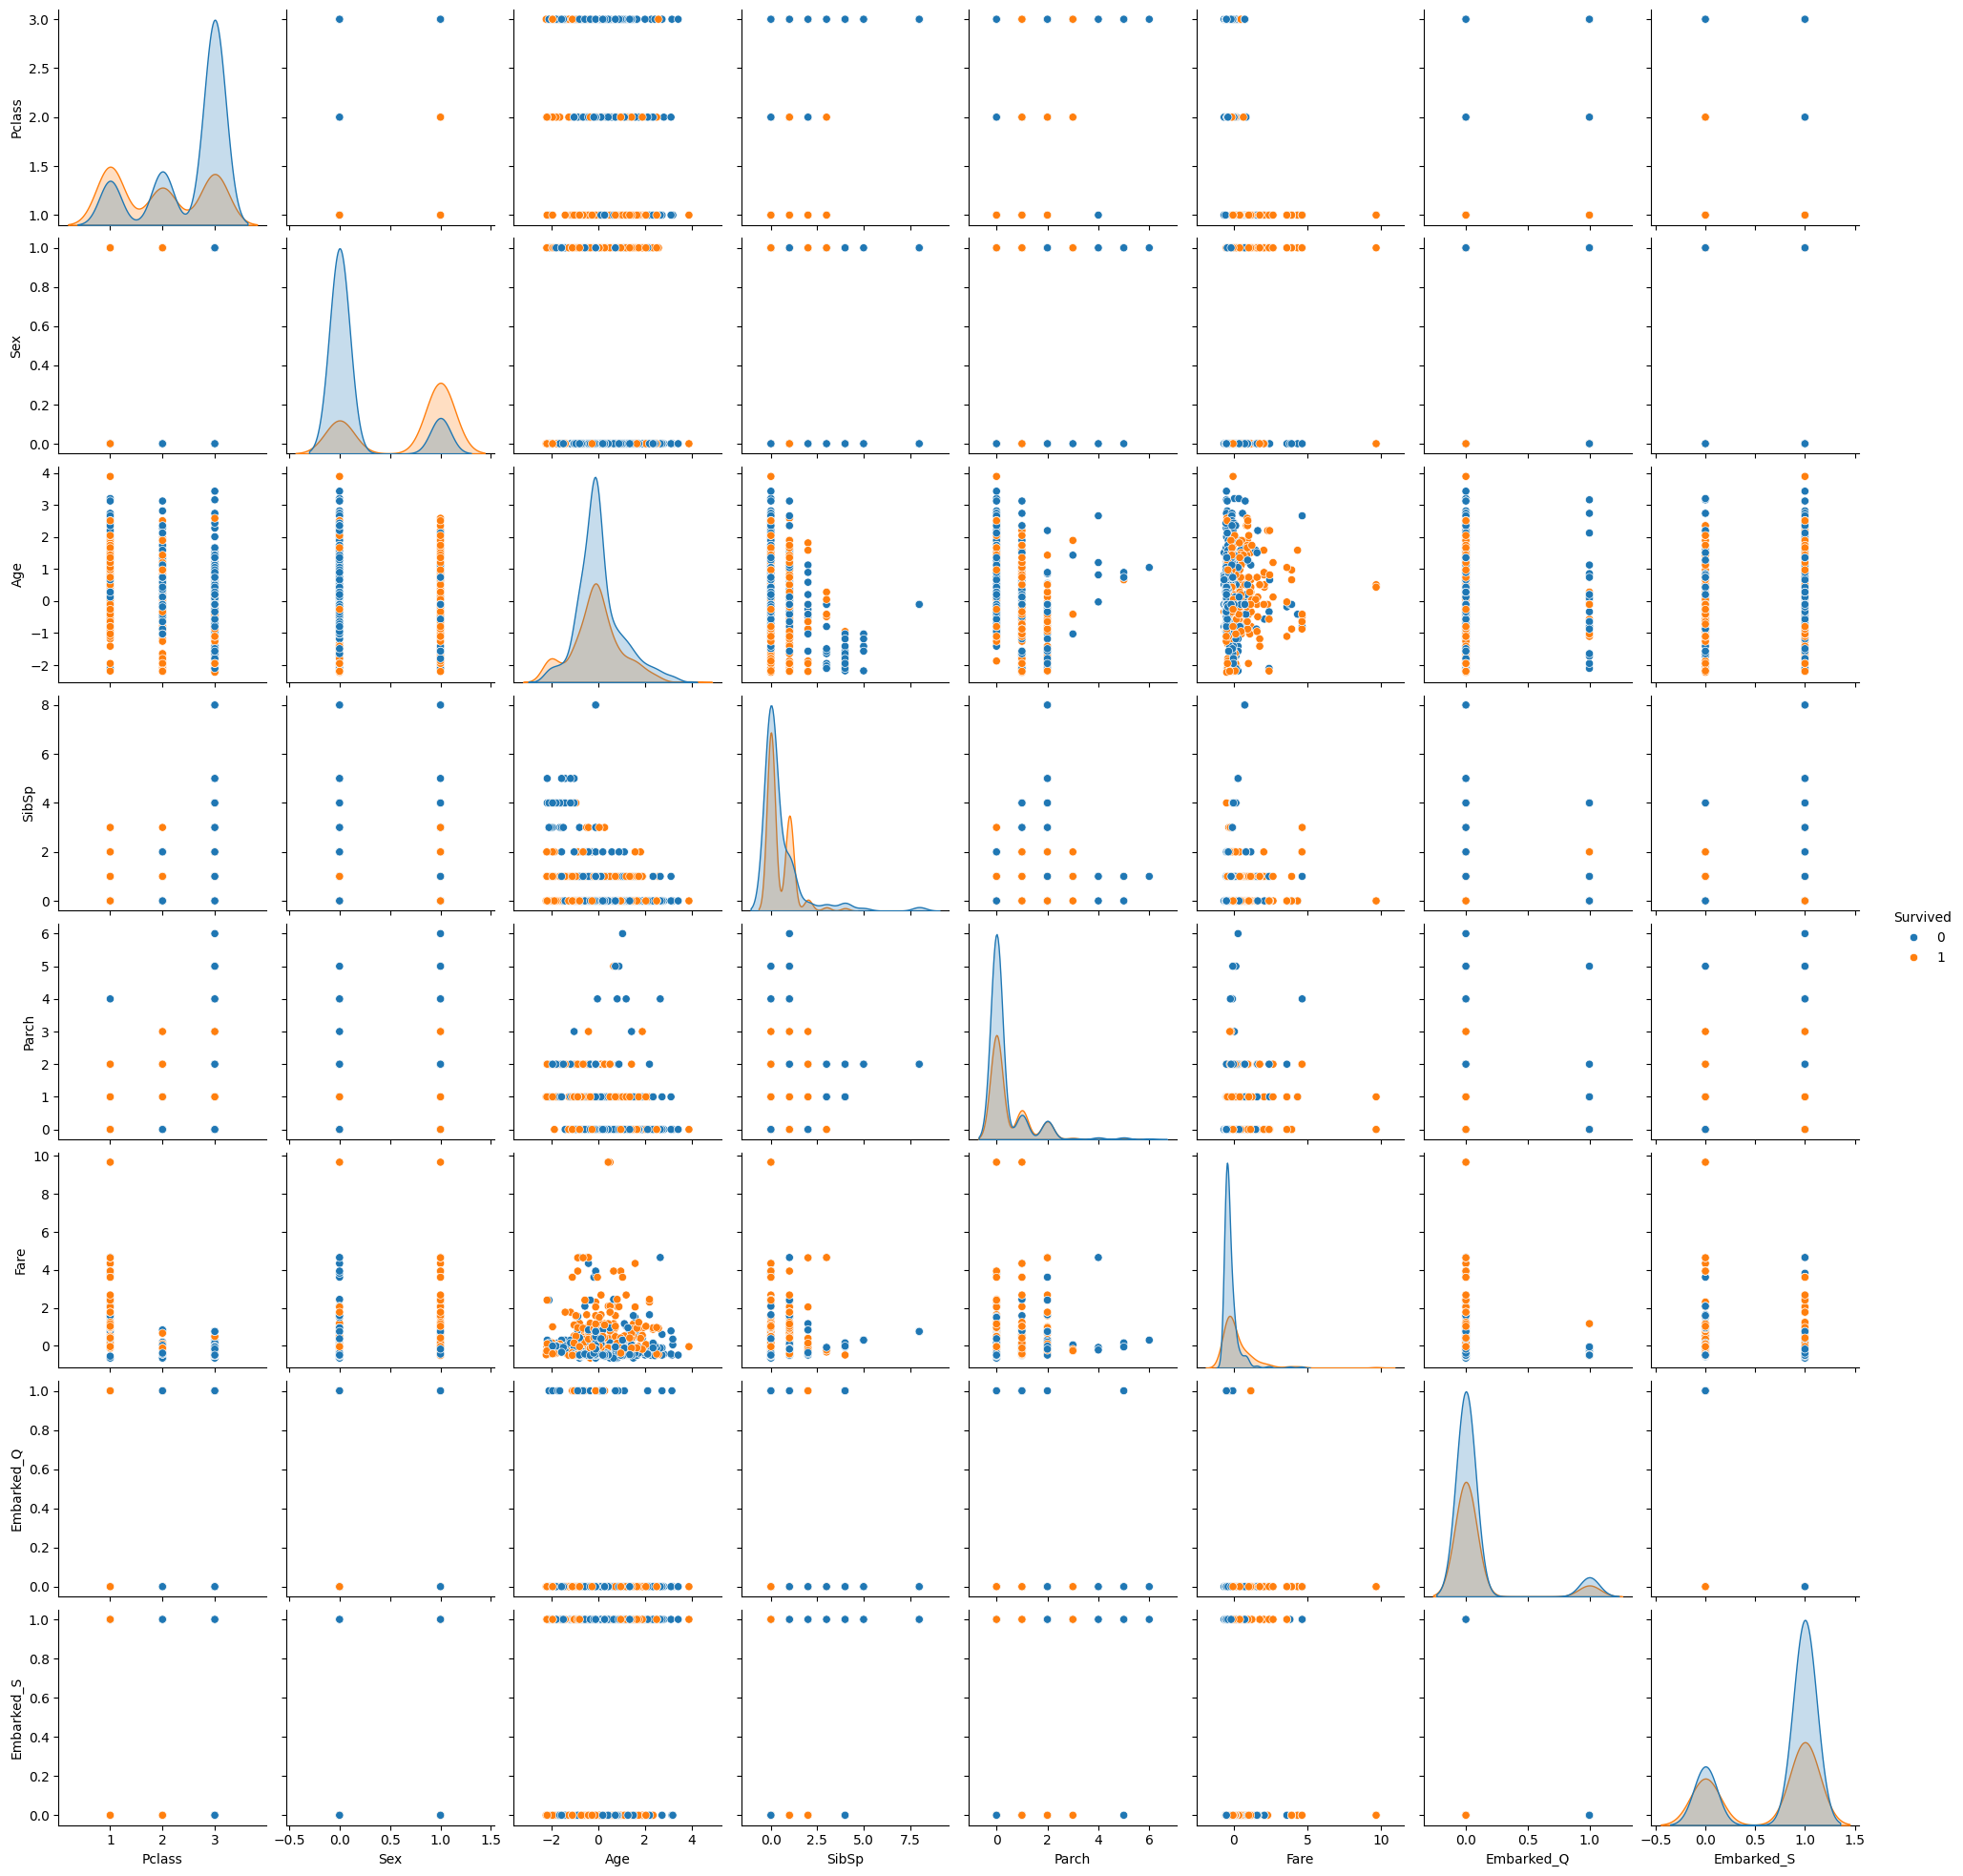

In [89]:
#Pairplot
sns.pairplot(df1, hue='Survived', diag_kind='kde')
plt.show()

#Model Building

###Apply Logistic regression





In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define your features (X) and target (y)
X = df1.drop('Survived', axis=1)
y = df1['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Evaluate the model's performance
test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)
print(classification_report(y_test, y_test_pred))


0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



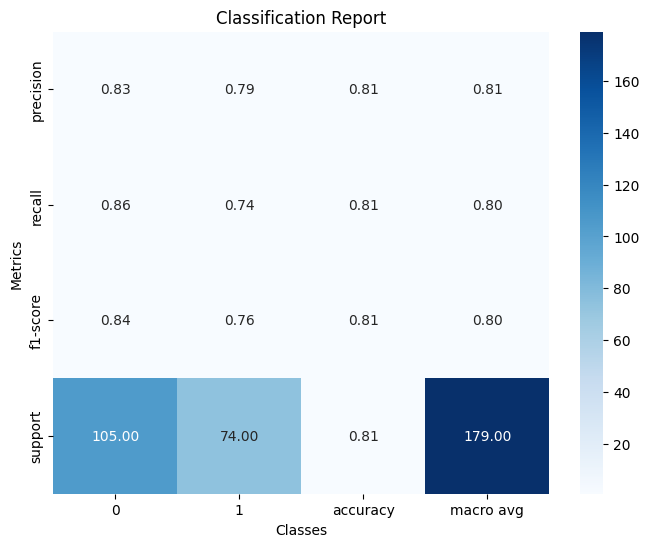

In [104]:
#Visualized the classification result for better understanding
report = classification_report(y_test, y_test_pred, output_dict=True)
#Convert report to a DataFrame
report_df = pd.DataFrame(report).transpose()

#Plotting the Heatmap for	precision	recall	f1-score
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')

#Adding the Title
plt.title('Classification Report')
#Adding the labels
plt.xlabel('Classes')
plt.ylabel('Metrics')
plt.show()

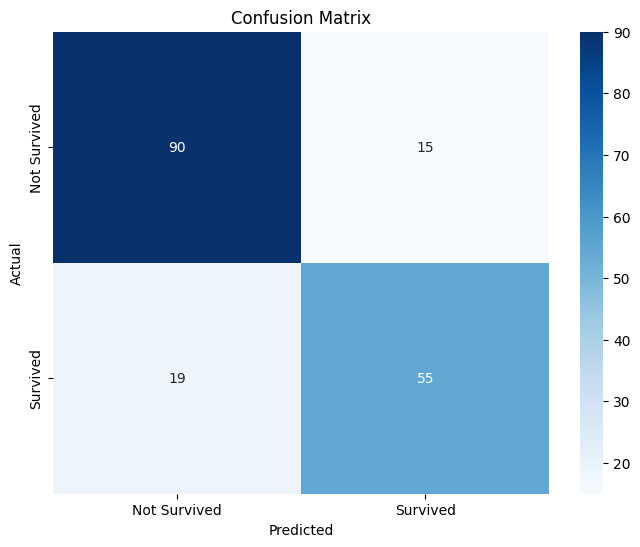

In [107]:
##Confusion matrix with heatmap visuals
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_test_pred)

#Plotting the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
#Adding Title
plt.title('Confusion Matrix')
#Adding the labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()